In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import signal
from IPython.display import HTML

# Code Implementing the Game of Life
The game_of_life() function takes in an initialized matrix A, and performs one iteration of the game of life. nearest_neighbor_interp_fast() uses scipy.convolve2d() to compute the sum of the next-nearest neighbor for each cell in A. Finally, initialize_random_life() initializes a matrix with some probability of life occurring in each cell.

In [2]:
def game_of_life(A, bc='Periodic'):
    """
    Given a matrix A of 0s and 1s, this function will apply the rules of the "Game of Life" to the matrix A.

    :param np.ndarray A: 2D Matrix of "life" to apply the rule of the game of life on. Must consist of 0s and 1s.
    :param str bc: Boundary condition on the matrix. Supports 'Periodic', 'Symmetric', or 'Open'.
        Sets a periodic boundary condition by default.
    :return: Matrix A after one iteration of the game of life.
    :rtype: np.ndarray
    """
    # Get sum of next nearest neighbors for every "cell" in A
    A_NN = nearest_neighbor_interp_fast(A, bc)

    # Create conditional statements that represent the rules of the game of life to the matrix A. Find whether a  
    # live cell stays alive, or a life-less cell finds life. Et en A[rcadia] ergo.
    remains_alive_condition = np.logical_and(A == 1, np.logical_or(A_NN == 2, A_NN == 3))
    reproduction_condition = np.logical_and(A == 0, A_NN == 3)

    # Apply the remains alive conditions and reproduction conditions. If either is true, populate the cell with a 1,
    # if neither is true, make the cell a 0.
    A_new = np.where(np.logical_or(remains_alive_condition, reproduction_condition), 1, 0).astype(np.int8)

    return A_new

def nearest_neighbor_interp_fast(A, bc):
    """
    This function uses the convolve2d function from scipy.signal to find the sum of the next nearest neighbors around
    every cell of A.

    Note: I read about how to use convolution2d and apply it to the sum of the next-nearest neighbors problem from
    the scipy documentation page, and the following stack overflow thread:
    https://stackoverflow.com/questions/35925317/vectorizing-sum-of-nearest-neighbours-in-matrix-using-numpy
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

    This approach is significantly faster than the "slow" version I wrote in nearest_neighbor_interp_slow which uses
    for loops to iterate over the elements of the matrix, and conditionals to check for boundary conditions. For small
    matrices, like 3x3 or 5x5, the difference is negligible, but for large matrices the difference is significant. For
    example, for a 1000x1000 matrix the "slow" approach takes 67,0494 ms, whereas the scipy convolve2d approach
    takes 393 ms. Pretty significant...

    :param np.ndarray A: 2D Matrix representing life
    :return: Sum of next nearest neighbors for every cell in A
    :rtype: np.ndarray
    """
    # Define kernel for next-nearest neighbor sum
    k = [[1, 1, 1],
         [1, 0, 1],
         [1, 1, 1]
         ]

    # Enforce periodic boundary conditions on the convolution
    if bc == 'Periodic':
        convolution = signal.convolve2d(A, k, mode='same', boundary='wrap')
        
    # Enforce symmetric boundary conditions on the convolution
    elif bc == 'Symmetric':
        convolution = signal.convolve2d(A, k, mode='same', boundary='symm')
        
    # Enforce open boundary conditions on the convolution
    else:
        convolution = signal.convolve2d(A, k, mode='same', boundary='fill')

    return convolution

def initialize_random_life(size, p=.5):
    """
    Takes in a tuple of size and returns an np array with life randomly generated
    :param tuple size: Size of the life environment
    :param float p: Probability that life begins in a cell
    :return: Initial conditions of the life simulation
    :rtype: tuple
    """
    A = np.random.random(size)
    return np.where(A > p, 0, 1).astype(np.int8)

In [3]:
# Define a function to iterate the Game of Life, and animate the results.
def animate(i):
    global life, biodensity
    image.set_data(life)
    ax.set_title(f'Life after {i} iterations.')
    life = game_of_life(life, bc='Periodic')
    return image,

# Define a function to iterate the Game of Life, and animate the results. This animate function uses open boundary
# conditions for the life simulation
def animate_open(i):
    global life, biodensity
    image.set_data(life)
    ax.set_title(f'Life after {i} iterations.')
    life = game_of_life(life, bc='Open')
    return image,

# Problem 14.6

### (a) For the first initial condition I pick the one corresponding to the question "will it ever end?".###

![Will it ever end?](./Gol_acorn.png)


In [4]:
life = np.load('./will_it_ever_end.npy')

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)

# Animate iterations of life
anim = FuncAnimation(fig, animate, interval=200, frames=frames, repeat=False)
plt.close(fig)
HTML(anim.to_html5_video())

FileNotFoundError: [Errno 2] No such file or directory: './will_it_ever_end.npy'

Clearly life dies out across the entire environment around iteration 84.

Next, I will try the **fourth** initial condition iteration from figure 12.b.

![Initial conditions](./Gol_configs.png)


In [188]:
life = np.load('./initial_condition_04.npy')

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)

# Animate iterations of life
anim = FuncAnimation(fig, animate, interval=200, frames=frames, repeat=False)
plt.close(fig)
HTML(anim.to_html5_video())

With the fourth initial condition, life changes between two states at every iteration.

Finally, I pick the **sixth** initial condition from figure 14.2b. However, I perform this simulation once with periodic boundary conditions, and again with open boundary conditions. Clearly, the boundary conditions result in different end states for life. 

In [189]:
# PERIODIC BOUNDARY CONDITIONS

life = np.load('./initial_condition_06.npy')

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
plt.close(fig)

# Animate iterations of life
anim = FuncAnimation(fig, animate, interval=200, frames=frames, repeat=False)
HTML(anim.to_html5_video())

In [191]:
# OPEN BOUNDARY CONDITIONS


life = np.load('./initial_condition_06.npy')

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
plt.close(fig)


# Animate iterations of life
anim = FuncAnimation(fig, animate_open, interval=200, frames=frames, repeat=False)
HTML(anim.to_html5_video())

### (b) Modify Life so that each cell is initially alive with a 50% probability ### 

When starting life with a 50% probability chances are pretty good that it survives the duration of the animation. some of the common shapes are: 2x2 squares, bars of length 3 that flip horizontally and vertically at each iteration, and the cross/circle pattern that we can see in the fourth initial condition from figure 14.2b.

In [5]:
initial_prob = 0.5
life = initialize_random_life((32, 32), initial_prob)

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
plt.close(fig)


# Animate iterations of life
anim = FuncAnimation(fig, animate, interval=200, frames=frames, repeat=False)
HTML(anim.to_html5_video())

### (b) Modify Life so that each cell is initially alive with a 20% probability ### 

What happens? Often, there is not enough starting life in close proximity to allow for propogation and life dies out after 10-20 iterations. I haven't done any statistical analysis, but ancedotally it appear to propogate around 50% of the time.

In [193]:
initial_prob = 0.2
life = initialize_random_life((32, 32), initial_prob)

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
plt.close(fig)


# Animate iterations of life
anim = FuncAnimation(fig, animate, interval=200, frames=frames, repeat=False)
HTML(anim.to_html5_video())

### (b) Modify Life so that each cell is initially alive with a 70% probability ### 

What happens? As you would expect, there's a high die off after the first iteration because the number of cells with more than 3 neighbors is higher. After the first iteration life decreases to around 10-14% and fluctuates around that number. 

In [194]:
initial_prob = 0.7
life = initialize_random_life((32, 32), initial_prob)

# Define the matplotlib goodies for an animation
frames = 100
fig, ax = plt.subplots(constrained_layout=False)
image = ax.imshow(life)
plt.close(fig)


# Animate iterations of life
anim = FuncAnimation(fig, animate, interval=200, frames=frames, repeat=False)
HTML(anim.to_html5_video())

### (C) Given the density of live cells at time $t$ is $\rho(t)$, what is $\rho(t+1)$?

We can think of $\rho(t)$ as $\rho(t) = \frac{alive(t)}{\textrm{total cells}}$. Thus, we can equivalently think of $\rho(t+1)$ as $\frac{\textrm{alive}(t+1)}{\textrm{total cells}}$, where the number of cells alive a time $t+1$ is given by:

$$\textrm{alive}(t+1) = Prob(\textrm{Cell stays alive}) \times (\textrm{# of live cells}) + Prob(\textrm{Dead cell comes alive}) \times (\textrm{# of dead cells})$$

Given the two conditions for life given by the rules of the Game of Life, the probabilty of life existing at time $t+1$ depends on live cells having 2 or 3 neighbors, or dead cells having 3 neighbors. Formally, for a cell $c$ and neighbors $n$ this looks like:

$$P(c = 1 \space \wedge \space (n = 2 \lor n = 3)) + P(c = 0 \space \wedge \space n = 3) $$

In [195]:
# How many times should we iterate life, and how many different initial probabilities
# should we consider?
iters = 1000
probs = 4
p = 0.5

# Initialize matrix to hold values of rho
rho = np.zeros([iters, 2, probs])

p_count = 0
# Iterate over 5 different probabilities of initial life on the board
for p in np.linspace(0.2, .8, probs):
    life = initialize_random_life((32, 32), p)
    rho[0, 0, p_count] = np.mean(life)
    for i in range(1, iters):
        life = game_of_life(life)
        density = np.mean(life)
        rho[i, 0, p_count] = density
        rho[i-1, 1, p_count] = density
    p_count += 1

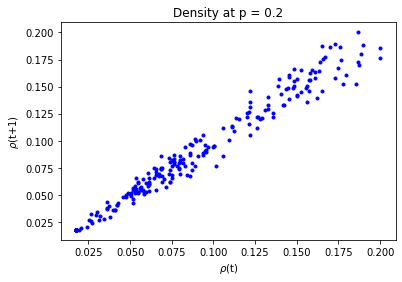

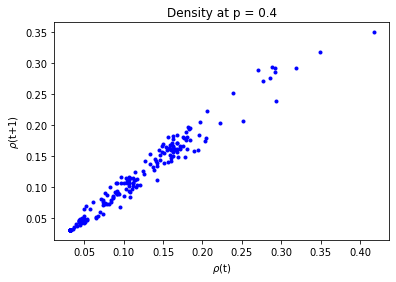

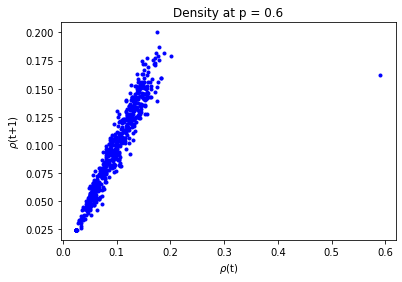

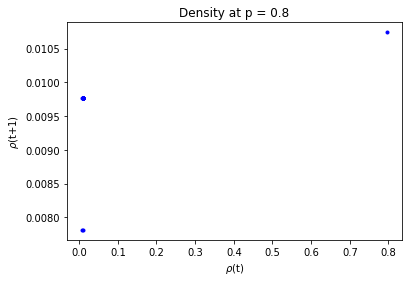

In [196]:
fig1, ax1 = plt.subplots()
ax1.plot(rho[:-1, 0, 0], rho[:-1, 1, 0], '.b')
ax1.set_title('Density at p = 0.2')
plt.xlabel("$\\rho$(t)")
plt.ylabel("$\\rho$(t+1)")

fig2, ax2 = plt.subplots()
ax2.plot(rho[:-1, 0, 1], rho[:-1, 1, 1], '.b')
ax2.set_title('Density at p = 0.4')
plt.xlabel("$\\rho$(t)")
plt.ylabel("$\\rho$(t+1)")

fig3, ax3 = plt.subplots()
ax3.plot(rho[:-1, 0, 2], rho[:-1, 1, 2], '.b')
ax3.set_title('Density at p = 0.6')
plt.xlabel("$\\rho$(t)")
plt.ylabel("$\\rho$(t+1)")

fig4, ax4 = plt.subplots()
ax4.plot(rho[:-1, 0, 3], rho[:-1, 1, 3], '.b')
ax4.set_title('Density at p = 0.8')
plt.xlabel("$\\rho$(t)")
plt.ylabel("$\\rho$(t+1)")


plt.show()

### (c) $\rho(t)$ vs $\rho(t+1)$ Analysis ### 

Observing the plots above, it appears that the relationship between $\rho(t)$ and $\rho(t+1$ is heavily dependen on $p$, as the brief statistical forray from above would have us believe. As $p$ increases, the rate of change beween $\rho(t)$ and $\rho(t+1$ nonlinearly decreases. See the graph for $p=0.8$ for the most drastic example of this – there is a massive die out after the first iteration, and then all of the remaining iteraions have densities of close to $0$.

### (c) Finally, we consider the steady stay density of life at $p = 0.5$ ###

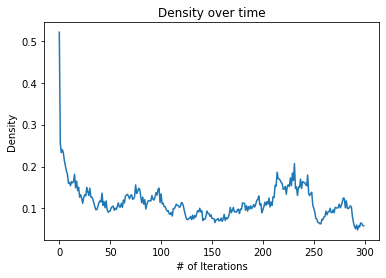

In [197]:
# How many times should we iterate life, and how many different initial probabilities
# should we consider?
iters = 300
p = 0.5

# Initialize matrix to hold values of rho
biomass = np.zeros([iters])

# Iterate over 5 different probabilities of initial life on the board
life = initialize_random_life((32, 32), p)
biomass[0] = np.mean(life)
for i in range(1, iters):
    life = game_of_life(life)
    density = np.mean(life)
    biomass[i] = density
        
# plot density vs iterations on a plot
plt.plot(biomass)
plt.title('Density over time')
plt.ylabel('Density')
plt.xlabel('# of Iterations')
plt.show()